In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%R
require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [5]:
import pandas as pd

df = pd.read_csv("Texas_Food_Acessibility - Sheet1.csv")
df.head()

,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,48001950100,Texas,Anderson County,0,4685,1874,0,49,1.05,0,...,912,4012,452,22,0,13,186,236,46,165
1,48001950401,Texas,Anderson County,0,5422,77,1,5219,96.26,0,...,24,1825,2266,21,0,5,1305,1324,0,0
2,48001950402,Texas,Anderson County,0,7535,83,1,7315,97.08,1,...,134,2591,3248,13,0,10,1673,1737,0,12
3,48001950500,Texas,Anderson County,1,4377,1604,0,86,1.96,1,...,627,2737,800,19,2,20,799,1389,130,310
4,48001950600,Texas,Anderson County,1,6405,2253,0,96,1.50,1,...,791,3831,1674,68,4,43,785,1253,230,289


In [6]:
%%R

df <- read_csv('Texas_Food_Acessibility - Sheet1.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 147
  CensusTract State County      Urban Pop2010 OHU2010 GroupQuartersFlag NUMGQTRS
        <dbl> <chr> <chr>       <dbl>   <dbl>   <dbl>             <dbl>    <dbl>
1 48001950100 Texas Anderson C…     0    4685    1874                 0       49
2 48001950401 Texas Anderson C…     0    5422      77                 1     5219
3 48001950402 Texas Anderson C…     0    7535      83                 1     7315
4 48001950500 Texas Anderson C…     1    4377    1604                 0       86
# ℹ 139 more variables: PCTGQTRS <dbl>, LILATracts_1And10 <dbl>,
#   LILATracts_halfAnd10 <dbl>, LILATracts_1And20 <dbl>,
#   LILATracts_Vehicle <dbl>, HUNVFlag <dbl>, LowIncomeTracts <dbl>,
#   PovertyRate <dbl>, MedianFamilyIncome <chr>, LA1and10 <dbl>,
#   LAhalfand10 <dbl>, LA1and20 <dbl>, LATracts_half <dbl>, LATracts1 <dbl>,
#   LATracts10 <dbl>, LATracts20 <dbl>, LATractsVehicle_20 <dbl>,
#   LAPOP1_10 <chr>, LAPOP05_10 <chr>, LAPOP1_20 <chr>, LALOWI1_10 <chr>, …
# ℹ Use `colnames()

In [7]:
%%R 

df_summary <- df %>%
    group_by(Urban) %>%
    summarise(Total_Offenses = n())
df_summary

# A tibble: 2 × 2
  Urban Total_Offenses
  <dbl>          <int>
1     0           1142
2     1           4096


In [8]:
%%R
model <- lm(TractLOWI ~  PovertyRate, data = df)
summary(model)


Call:
lm(formula = TractLOWI ~ PovertyRate, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6287.2  -705.1  -224.3   487.4 10020.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  946.715     26.456   35.78   <2e-16 ***
PovertyRate   53.435      1.278   41.82   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1128 on 5236 degrees of freedom
Multiple R-squared:  0.2504,	Adjusted R-squared:  0.2503 
F-statistic:  1749 on 1 and 5236 DF,  p-value: < 2.2e-16



In [9]:
%%R

model <- lm(PovertyRate ~ TractHUNV, data = df)
summary(model)


Call:
lm(formula = PovertyRate ~ TractHUNV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.211  -7.620  -2.251   5.523  88.817 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.182721   0.210711   53.07   <2e-16 ***
TractHUNV    0.056689   0.001514   37.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 5236 degrees of freedom
Multiple R-squared:  0.2111,	Adjusted R-squared:  0.211 
F-statistic:  1401 on 1 and 5236 DF,  p-value: < 2.2e-16



`geom_smooth()` using formula = 'y ~ x'


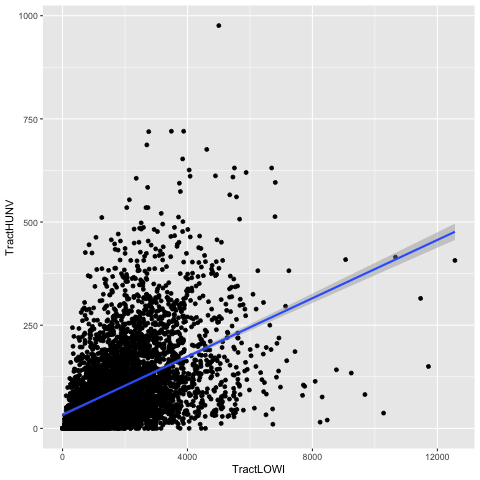

In [10]:
%%R 

ggplot(df) + 
	aes(x = TractLOWI, y = TractHUNV) + 
	geom_point() +
	geom_smooth(method='lm')

In [11]:
%%R
model <- lm(TractLOWI ~ PovertyRate + TractHUNV + TractSNAP, data = df)
summary(model)


Call:
lm(formula = TractLOWI ~ PovertyRate + TractHUNV + TractSNAP, 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3136.9  -404.5  -116.3   284.2  5698.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 556.15211   16.86783  32.971  < 2e-16 ***
PovertyRate   4.60026    0.96368   4.774 1.86e-06 ***
TractHUNV    -0.66128    0.12072  -5.478 4.51e-08 ***
TractSNAP     5.70759    0.06599  86.497  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 689.1 on 5234 degrees of freedom
Multiple R-squared:  0.7203,	Adjusted R-squared:  0.7202 
F-statistic:  4494 on 3 and 5234 DF,  p-value: < 2.2e-16

